## Neural Networks Definition


### But what is a Neural Network anyway?


For a dataset of dosages , ( low , medium and high), we can't fit a straight line to make an accurate prediction


![alt](https://i.imgur.com/TcuaKgc.png)


A Neural network can effectively fit a squiggle for the data, even for complicated data.


### Definition

- When you build a NN you have to decide what activation function you may use ( for learning : sigmoid , in practice : ReLU)
- When you build a NN you make a guess on how many hidden layers and input you will use.


Let's use this as an example of a NN :


![alt](https://miro.medium.com/max/875/1*dypctO_eJnrXqX6JUa5MDA.jpeg)


Where a Hidden Layer can be defined as:

- $ H*i = W*{ij} \ * I\_{i} + B$

'W' represents the weight and is every connection between the input layer and the hidden layer


### Perceptron


A [Perceptron](https://en.wikipedia.org/wiki/Perceptron) can be defined as single layer NN , it's based on an artificial neuron, it can take several binary inputs $x_1,x_2,...,$ and produce a single binary output


![img](http://neuralnetworksanddeeplearning.com/images/tikz0.png)


For a Hidden node , the math processed is a 'weighted sum' , like so:


![alt](https://i.imgur.com/hur6mHW.png)


# NeuralNetwork code and testing


Let's code a NN from scratch !


In [1]:
import numpy as np

## The weights , the heart of a NN

The weights are one of the most important parameters of a NN, they are basically the link between the different layers of the NN , and they help feeding the error , calculating the prediction , and it's basically what helps improving the NN , the weight link can be represented as matrices , so we will use that to implement them.


Basically :


- A matrix for the weights for links between the input and hidden layers $W_{input \ hiden}$ , of $ dim = (​
  input_nodes​ \ x\ hidden_nodes ) $


- A matrix for the weights for links between the hidden and the output layers $W_{hidden\_output}$ , of $dim = (​
 output\_nodes ​  \ x\ hidden\_nodes )$


The initial values of the link weights should be small and
random , unlike in logistic regression where we can simply set the initial weights as 0 , in a NN this will NOT work (if you initial the hidden units as 0 , then all of them will be symmetric matrices)


$dw=\begin{bmatrix}
u & v \\
u & v 
\end{bmatrix}$


Since both hidden units (eg: $a_1$ and $a_2$ ) will have the same influence on the output layer , after one iteration or many , both will remain symmetric , and no mather how many times you run it will compute the same function.


Neural networks learn by refining their link weights. This is guided by the error​: the difference between the right answer given by the training data and their actual output.


## Random Initialization


To avoid ending up in extreme parts of the correspoint function, it would be helpful to set $W$ as small numbers


In [2]:
np.random.random((1,3)) - 0.5 # define also negative weights


array([[ 0.36793829,  0.19483474, -0.3738566 ]])

●
Gradient descent​ is a really good way of working out the minimum of a function, and it really works well when that function is so complex and difficult that we couldn’t easily
work it out mathematically using algebra.


Defining the error as a matrix:


$$ error*{hidden} = W^T * {hidden\_output} \ * error\_{output} $$


$$ y = mx + b $$


We want $m$ to change based on the error :


$$ \Delta m = \alpha x\ * error $$

$$ \Delta B = \alpha error $$


## Back propagation with gradient descent


Gradient Descent is defined as a " first-order iterative optimization algorithm for finding a local minimum of a differentiable function", that is , in more human terms , a way of finding the steepest descent to a minimum .


In the case of Neural Networks , we are trying to minimize the NN error, defining the weight :

$$ \frac{\partial E}{\partial W\_{jk}} $$



$$ \Delta W_{jk} = \alpha E_k (O_k) + \sigma(O_k) (1-\sigma(O_k)) (O_j)^T $$



This will help us find the change in error as the weight links change.


Improving a neural network means reducing this error ­ by changing those weights


●
Choosing the right weights directly is too difficult. An alternative approach is to
iteratively improve the weights by descending the <b> error </b> function, taking small steps.
Each step is taken in the direction of the greatest downward slope from your current
position. This is called ​ g
radient descent​
.


A good recommendation is to rescale inputs into the range 0.0 to 1.0. Some will add a small
offset to the inputs, like 0.01, just to avoid having zero inputs which are troublesome because
they kill the learning ability by zeroing the weight update expression by setting that ​ oj=0.


- We should try to avoid saturating a NN keeping the inputs small


How to actually propagate weights ?


In [206]:
# No Bias Neural Network Class
from scipy.special import expit  # expit reprents the sigmoid function

class neuralNetwork:
    #constructor body

    def __init__(self,input_nodes,hidden_nodes,output_nodes,alpha):
        
        # defining a sigmoid or activation only once so that it can be referenced several times
        self.sigmoid = lambda x: expit(x)
        
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # learning rate
        self.alpha = alpha

        # weights

        self.W_ih =  np.array(np.random.random((self.hidden_nodes,self.input_nodes))) - 0.5 # needs to be array
        self.W_ho = np.array(np.random.random((self.output_nodes,self.hidden_nodes))) - 0.5 


        pass 

        
    def train(self,inputs_list,target_variable): # target_variable represent 'y' or the variable you want to predict
        
        inputs = np.array(inputs_list, ndmin=2).T
        outputs,hidden_outputs = self.feedforward(inputs_list)
        target = np.array(target_variable, ndmin=2).T
        
        #print(target_variable)
        
        # Find the error e = (t - o) - matrix subtraction 
        output_errors = target - outputs

        # getting the hidden error ( W.T * e) - weights hidden - outputs
        W_ho_T= (self.W_ho).T # transpose the weight matrix
                
        # find hidden layer error
        hidden_errors = np.dot(W_ho_T,output_errors)
        
        # NOTE : FEED FORWARD already mapped the outputs to the sigmoid function
        # implementing the delta weight change between the hidden layer and the output layer
        
        gradient = lambda x : x * (1-x)
        
        gradient_Who = gradient(outputs)
        gradient_Wih = gradient(hidden_outputs)
        
        # link update between hidden layers and the output layers
        self.W_ho += self.alpha * np.dot(gradient_Who, np.transpose(hidden_outputs))
        
        # link update between input layers and the hidden layers
        self.W_ih += self.alpha * np.dot(gradient_Wih,np.transpose(inputs))


        pass



    # receive inputs -> generate hidden ! outputs
    # feeding the information forward to the NN
    def feedforward(self,inputs_list):
        
        # before predicting we need to turn the input into a 2D
        inputs = np.array(inputs_list, ndmin=2).T

    
        # after that , we do a matrix multiplication of the inputs with the weights 
        # TODO add Bias
        hidden_inputs = np.dot(self.W_ih,inputs)
        # calculate the sigmoid function
        hidden_outputs = self.sigmoid(hidden_inputs)
        
        # take the hidden outputs and do the matrix product between the hidden layer and the output layer

        final_inputs = np.dot(self.W_ho,hidden_outputs)
        

        outputs = self.sigmoid(final_inputs)

        
        return outputs,hidden_outputs


# number of input, hidden and output nodes
# input_nodes =2
# hidden_nodes = 2
# output_nodes = 1
# create instance of neural network

#

# n = neuralNetwork(2,2,2,0.5)

# input_nodes = [1,0]
# targets = [1,0]
# n.train(input_nodes,targets)

# class instance of the neural network       

## Training the Neural network 

In [216]:
# The training data.
X = np.array([
    [0, 1],
    [1, 0],
    [1, 1],
    [0, 0]
])

# The labels for the training data.
y = np.array([
    [1],
    [1],
    [0],
    [0]
])

In [122]:
import scipy.special

# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10


In [220]:
X

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

In [139]:
r = list(range(1000))
random.shuffle(r)
for i in r:
    

import random
for i in range(5000):
    for j in range(4):
        x = random.choice(X[j])
        print(x[j],y[j])
        

IndexError: invalid index to scalar variable.

In [225]:
n = neuralNetwork(2,2,1,0.01)

#random.shuffle(training_data)
# TODO : fix this damn thing
for i in range(5000):
    for j in range(4):
        n.train(X[j],y[j])
        
print(n.feedforward([0,1])[0])

[[0.99749076]]


## The MNIST Dataset of Handwritten Numbers

In [226]:
!wget https://raw.githubusercontent.com/makeyourownneuralnetwork/makeyourownneuralnetwork/master/mnist_dataset/mnist_train_100.csv

--2021-11-24 13:27:17--  https://raw.githubusercontent.com/makeyourownneuralnetwork/makeyourownneuralnetwork/master/mnist_dataset/mnist_train_100.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182023 (178K) [text/plain]
Saving to: 'mnist_train_100.csv'

     0K .......... .......... .......... .......... .......... 28%  788K 0s
    50K .......... .......... .......... .......... .......... 56% 1.86M 0s
   100K .......... .......... .......... .......... .......... 84% 1.15M 0s
   150K .......... .......... .......                         100% 4.81M=0.1s

2021-11-24 13:27:18 (1.26 MB/s) - 'mnist_train_100.csv' saved [182023/182023]



In [237]:
data_file = open('mnist_train_100.csv','r') # r parameter is optional
data_list = data_file.readlines() 
data_file.close()

In [238]:
len(data_list)

100

In [243]:
import matplotlib.pyplot as plt


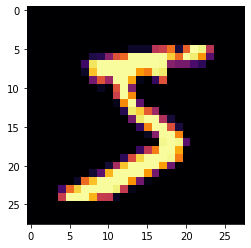

In [266]:
all_value = data_list[0].split(',')

img_array = np.asfarray(all_value[1:]).reshape(28,28) # return array convert to float type

plt.imshow(img_array,cmap='inferno',interpolation='None')

## Preparing the MNIST Training Data


We’ve worked out how to get data out of the MNIST data files and disentangle it so we can
make sense of it, and visualise it too. We want to train our neural network with this data, but we
need to think just a little about preparing this data before we throw it at our neural network

We need to rescale the input color values from 0 to 255 , to a smaller range , say (0.01-1.0) avoiding 0 so they don't transform weights into .

In [267]:
scale = ( np.asfarray(all_value[1:]) )/ (255 * 0.99) + 0.01

In [269]:
print(scale)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

For a label '5' the output should be:

Example "5" : 
`
[0.01, 
0.01,
0.01,
0.01,
0.99,
0.01,
0.01,
001,
0.01,
0.01]`


In [270]:
# constructing the target matrix:

output_nodes=10

target = np.zeros(output_nodes) + 0.01
target[int(all_value[0])] = 0.99

In [271]:
target

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01])